Mounting Drive

In [20]:
#from google.colab import drive
#drive.mount('/content/drive/')

Import Libraries

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model

**Train Data**

In [17]:
path="../Control_400/two_three"
train=os.listdir(path)
print(train)
print("Training Data:- ")
for f in train:
  path="../Control_400/two_three/"+f
  print(f+ " "+ str(len(os.listdir(path))))

['Third_400', 'Second_400']
Training Data:- 
Third_400 400
Second_400 400


**Valid Data**

In [18]:
from keras.utils import load_img, img_to_array
path="../Control_400/two_three"
test=os.listdir(path)
print(test)
image_data_train=[]
label_train=[]
for f in test:
    path="../Control_400/two_three/"+f+'/'
    entries=os.listdir(path)
    for entry in entries:
        if f=='Second_400':
            label=0
        else:
            label=1
        img=load_img(path+entry,target_size=(224,224,3))
        image_array=img_to_array(img)/255.0
        image_data_train.append(image_array)
        label_train.append(label)
image_data_train=np.array(image_data_train)
label_train=np.array(label_train)
print(image_data_train.shape)
print(len(label_train))

['Third_400', 'Second_400']
(800, 224, 224, 3)
800


In [19]:
import sklearn.model_selection as sk

X1_train, X_test, y1_train, y_test =  sk.train_test_split(image_data_train,label_train,test_size=0.15, random_state = 1)
X_train, X_valid, y_train, y_valid =  sk.train_test_split(X1_train,y1_train,test_size=0.15, random_state = 1)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Resnet 50**

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet", pooling='max')

for layer in base_model.layers:
    layer.trainable = False

In [6]:
from tensorflow.keras import layers 
from tensorflow.keras import Model

In [28]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(500, activation='relu')(x)
x = layers.Dense(108, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output


model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['acc'])

In [29]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [30]:
Resnethist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 2, epochs = 100, shuffle=True)


Epoch 1/100
2/2 [==============================] - 13s 7s/step - loss: 5.0467 - acc: 0.4948 - val_loss: 3.1277 - val_acc: 0.5000
Epoch 2/100
2/2 [==============================] - 11s 6s/step - loss: 1.9566 - acc: 0.5156 - val_loss: 0.8007 - val_acc: 0.5000
Epoch 3/100
2/2 [==============================] - 10s 6s/step - loss: 0.7748 - acc: 0.5554 - val_loss: 0.7525 - val_acc: 0.5000
Epoch 4/100
2/2 [==============================] - 11s 6s/step - loss: 0.7617 - acc: 0.4862 - val_loss: 0.7233 - val_acc: 0.5000
Epoch 5/100
2/2 [==============================] - 10s 6s/step - loss: 0.7691 - acc: 0.4689 - val_loss: 0.7055 - val_acc: 0.5000
Epoch 6/100
2/2 [==============================] - 10s 6s/step - loss: 0.7233 - acc: 0.5138 - val_loss: 0.7081 - val_acc: 0.5000
Epoch 7/100
2/2 [==============================] - 11s 6s/step - loss: 0.7310 - acc: 0.4792 - val_loss: 0.7311 - val_acc: 0.5000
Epoch 8/100
2/2 [==============================] - 10s 6s/step - loss: 0.7156 - acc: 0.5121 - val

2/2 [==============================] - 11s 6s/step - loss: 0.5667 - acc: 0.7007 - val_loss: 0.7798 - val_acc: 0.5098
Epoch 65/100
2/2 [==============================] - 11s 6s/step - loss: 0.4935 - acc: 0.7439 - val_loss: 0.7620 - val_acc: 0.5490
Epoch 66/100
2/2 [==============================] - 11s 6s/step - loss: 0.4941 - acc: 0.7734 - val_loss: 0.7514 - val_acc: 0.5098
Epoch 67/100
2/2 [==============================] - 11s 6s/step - loss: 0.4663 - acc: 0.7872 - val_loss: 0.7927 - val_acc: 0.5098
Epoch 68/100
2/2 [==============================] - 11s 6s/step - loss: 0.4591 - acc: 0.7803 - val_loss: 0.7907 - val_acc: 0.5098
Epoch 69/100
2/2 [==============================] - 11s 6s/step - loss: 0.4420 - acc: 0.7941 - val_loss: 0.8068 - val_acc: 0.4902
Epoch 70/100
2/2 [==============================] - 12s 7s/step - loss: 0.4412 - acc: 0.7907 - val_loss: 0.8377 - val_acc: 0.5000
Epoch 71/100
2/2 [==============================] - 11s 6s/step - loss: 0.4847 - acc: 0.7543 - val_loss

/tmp/ipykernel_854420/2147311014.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


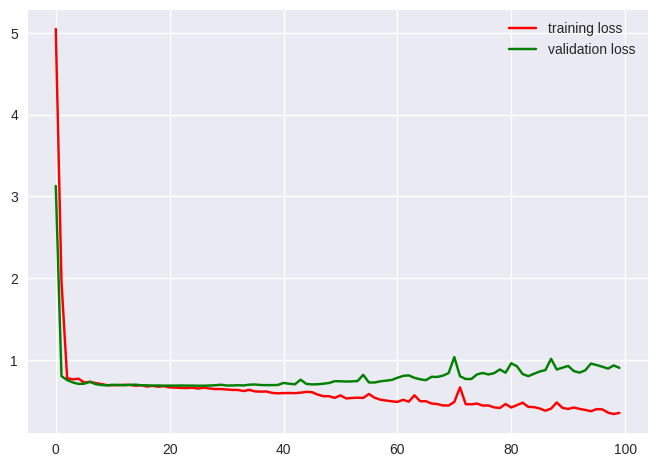

In [31]:
plt.style.use("seaborn")
plt.plot(Resnethist.history['loss'],label="training loss",c='red')
plt.plot(Resnethist.history['val_loss'],label="validation loss",c='green')
plt.legend()
plt.show()

/tmp/ipykernel_854420/2238839070.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


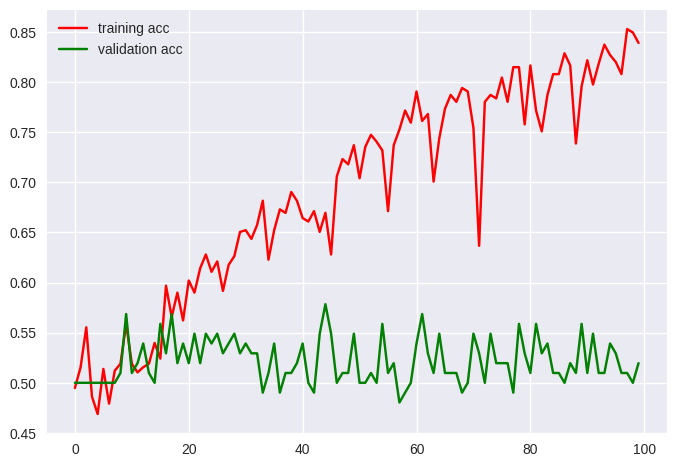

In [32]:
plt.style.use("seaborn")
plt.plot(Resnethist.history['acc'],label="training acc",c='red')
plt.plot(Resnethist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

4/4 [==============================] - 2s 436ms/step
confusion Matrix:
[[31 29]
 [22 38]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.58      0.52      0.55        60
 Trimester 3       0.57      0.63      0.60        60

    accuracy                           0.57       120
   macro avg       0.58      0.57      0.57       120
weighted avg       0.58      0.57      0.57       120

**********************************************
Accuracy Score : 0.575
**********************************************
F1 Score : 0.5984251968503937
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 51.66666666666667
Trimester 3 Accuracy : 63.33333333333333
**********************************************
ROC_AUC Score: 0.575
**********************************************
Cohen_kappa score: 0.15000000000000002


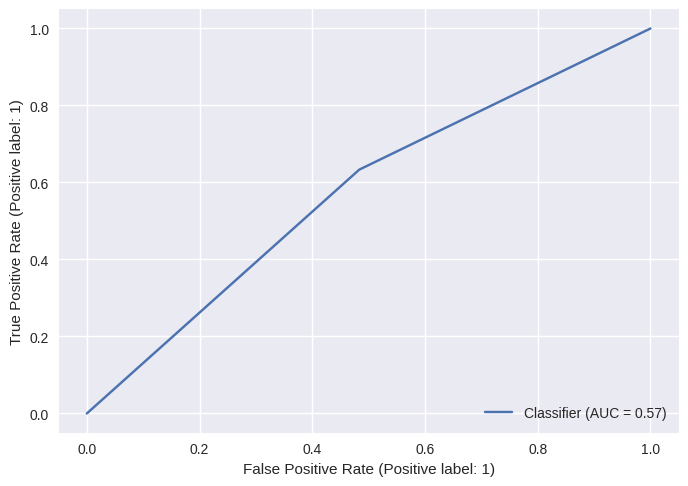

In [33]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [34]:
df = pd.DataFrame({'loss' : Resnethist.history["loss"],
                                'val_loss' : Resnethist.history["val_loss"],
                                'accuracy' : Resnethist.history["acc"],
                               "val_accuracy": Resnethist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Second_third/Resnethist_23.csv')

# **VGG 16**

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = VGG16(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

2023-02-27 07:01:07.742170: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 07:01:07.742210: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 07:01:07.742516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.8)(x)
#x = layers.Dense(300, activation='relu')(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.9)(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00008), loss = 'binary_crossentropy',metrics = ['acc'])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
vgghist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 1,  epochs = 100, shuffle=True)


Epoch 1/100


2023-02-27 07:01:18.673035: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 7424442368 exceeds 10% of free system memory.
2023-02-27 07:01:19.131254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 7424442368 exceeds 10% of free system memory.


1/1 [==============================] - 14s 14s/step - loss: 1.8760 - acc: 0.4983 - val_loss: 0.7865 - val_acc: 0.5000
Epoch 2/100


2023-02-27 07:01:32.205013: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 7424442368 exceeds 10% of free system memory.
2023-02-27 07:01:32.584555: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 7424442368 exceeds 10% of free system memory.


1/1 [==============================] - 13s 13s/step - loss: 1.7124 - acc: 0.4948 - val_loss: 0.6917 - val_acc: 0.5098
Epoch 3/100


2023-02-27 07:01:45.041408: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 7424442368 exceeds 10% of free system memory.


1/1 [==============================] - 13s 13s/step - loss: 1.5239 - acc: 0.4965 - val_loss: 0.6846 - val_acc: 0.5294
Epoch 4/100
1/1 [==============================] - 13s 13s/step - loss: 1.1336 - acc: 0.5000 - val_loss: 0.6866 - val_acc: 0.5882
Epoch 5/100
1/1 [==============================] - 13s 13s/step - loss: 0.9860 - acc: 0.5156 - val_loss: 0.6880 - val_acc: 0.5784
Epoch 6/100
1/1 [==============================] - 13s 13s/step - loss: 0.8211 - acc: 0.5346 - val_loss: 0.6868 - val_acc: 0.5686
Epoch 7/100
1/1 [==============================] - 13s 13s/step - loss: 0.7997 - acc: 0.5277 - val_loss: 0.6895 - val_acc: 0.5392
Epoch 8/100
1/1 [==============================] - 13s 13s/step - loss: 0.8261 - acc: 0.5190 - val_loss: 0.6890 - val_acc: 0.5196
Epoch 9/100
1/1 [==============================] - 13s 13s/step - loss: 0.7988 - acc: 0.4827 - val_loss: 0.6850 - val_acc: 0.6176
Epoch 10/100
1/1 [==============================] - 13s 13s/step - loss: 0.7892 - acc: 0.5035 - val_lo

Epoch 66/100
1/1 [==============================] - 13s 13s/step - loss: 0.6647 - acc: 0.5830 - val_loss: 0.6821 - val_acc: 0.5588
Epoch 67/100
1/1 [==============================] - 13s 13s/step - loss: 0.6638 - acc: 0.5571 - val_loss: 0.6826 - val_acc: 0.5392
Epoch 68/100
1/1 [==============================] - 13s 13s/step - loss: 0.6650 - acc: 0.5779 - val_loss: 0.6837 - val_acc: 0.5882
Epoch 69/100
1/1 [==============================] - 13s 13s/step - loss: 0.6665 - acc: 0.5865 - val_loss: 0.6841 - val_acc: 0.4902
Epoch 70/100
1/1 [==============================] - 13s 13s/step - loss: 0.6736 - acc: 0.5381 - val_loss: 0.6851 - val_acc: 0.5294
Epoch 71/100
1/1 [==============================] - 13s 13s/step - loss: 0.6746 - acc: 0.5830 - val_loss: 0.6798 - val_acc: 0.5490
Epoch 72/100
1/1 [==============================] - 13s 13s/step - loss: 0.6639 - acc: 0.5986 - val_loss: 0.6809 - val_acc: 0.5882
Epoch 73/100
1/1 [==============================] - 13s 13s/step - loss: 0.6705 - a

In [ ]:
plt.style.use("seaborn")
plt.plot(vgghist.history['loss'],label="training loss",c='red')
plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0.6,1.0)
plt.legend()
plt.show()

/tmp/ipykernel_1030866/1547550518.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


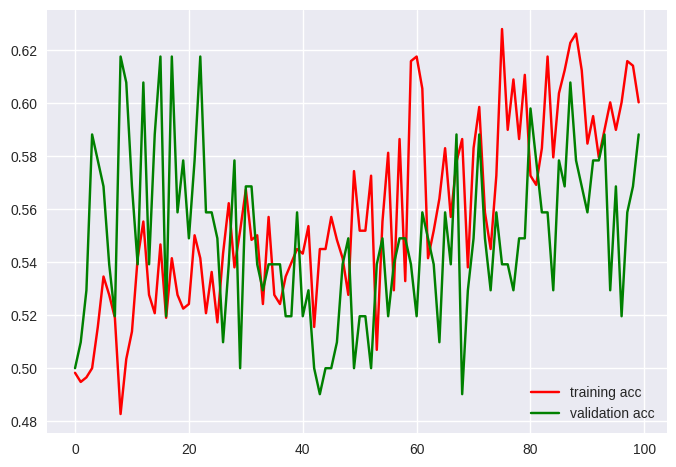

In [12]:
plt.style.use("seaborn")
plt.plot(vgghist.history['acc'],label="training acc",c='red')
plt.plot(vgghist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

4/4 [==============================] - 3s 622ms/step
confusion Matrix:
[[36 24]
 [20 40]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.64      0.60      0.62        60
 Trimester 3       0.62      0.67      0.65        60

    accuracy                           0.63       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.63      0.63      0.63       120

**********************************************
Accuracy Score : 0.6333333333333333
**********************************************
F1 Score : 0.6451612903225806
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 60.0
Trimester 3 Accuracy : 66.66666666666666
**********************************************
ROC_AUC Score: 0.6333333333333333
**********************************************
Cohen_kappa score: 0.2666666666666667


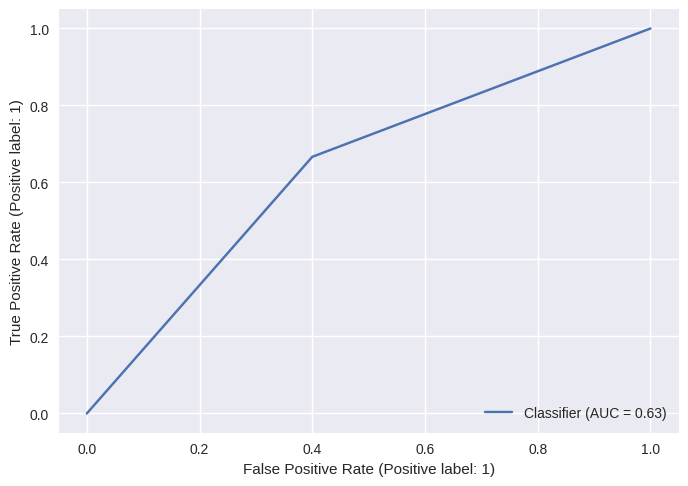

In [13]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [14]:
df = pd.DataFrame({'loss' : vgghist.history["loss"],
                                'val_loss' : vgghist.history["val_loss"],
                                'accuracy' : vgghist.history["acc"],
                               "val_accuracy": vgghist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Second_third/Vgghist_23.csv')

#**Efficient Net**

In [43]:
!pip install -U efficientnet

In [7]:
import efficientnet.keras as efn

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

2023-02-27 09:28:17.250843: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 09:28:17.250869: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 09:28:17.251275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from tensorflow.keras import optimizers

In [10]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.8)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                             

 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 56, 56, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 56, 56, 144)  576        ['block2b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2b_activation (Activation  (None, 56, 56, 144)  0          ['block2b_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_s

 block4b_se_excite (Multiply)   (None, 14, 14, 480)  0           ['block4b_activation[0][0]',     
                                                                  'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, 14, 14, 80)   38400       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 14, 14, 80)  320         ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (FixedDropout)    (None, 14, 14, 80)   0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_a

 block5a_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 14, 14, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 14, 14, 672)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6a_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 14, 14, 672)  0          ['block6a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6a_dwconv (DepthwiseConv2  (None, 7, 7, 672)   16800       ['block6a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 7, 7, 672)   2688        ['block6a_dwconv[0][0]']         
 )        

 )                                                                                                
                                                                                                  
 block6c_activation (Activation  (None, 7, 7, 1152)  0           ['block6c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 1152)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block7a_activation[0][0]',     
          

In [ ]:
ENetB0hist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 1,  epochs = 100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.0759 - acc: 0.5415 - val_loss: 0.7133 - val_acc: 0.5588
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 1.0201 - acc: 0.5554 - val_loss: 0.6842 - val_acc: 0.5392
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.8019 - acc: 0.6003

In [ ]:
plt.style.use("seaborn")
plt.plot(ENetB0hist.history['loss'],label="training loss",c='red')
plt.plot(ENetB0hist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0,3)
plt.legend()
plt.show()

In [ ]:
plt.style.use("seaborn")
plt.plot(ENetB0hist.history['acc'],label="training acc",c='red')
plt.plot(ENetB0hist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

In [ ]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [ ]:
df = pd.DataFrame({'loss' : ENetB0hist.history["loss"],
                                'val_loss' : ENetB0hist.history["val_loss"],
                                'accuracy' : ENetB0hist.history["acc"],
                               "val_accuracy": ENetB0hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Second_third/ENetB0hist_23.csv')

# **Efficient Net B7**

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB7(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [26]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
EnetB7hist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 1,  epochs = 100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 54s 54s/step - loss: 0.8078 - acc: 0.4931 - val_loss: 1.4135 - val_acc: 0.5000
Epoch 2/100
1/1 [==============================] - 41s 41s/step - loss: 1.5866 - acc: 0.5381 - val_loss: 7.4344 - val_acc: 0.5000
Epoch 3/100
1/1 [==============================] - 41s 41s/step - loss: 7.2612 - acc: 0.4965 - val_loss: 3.2477 - val_acc: 0.5000
Epoch 4/100
1/1 [==============================] - 41s 41s/step - loss: 3.5823 - acc: 0.5035 - val_loss: 5.9815 - val_acc: 0.5000
Epoch 5/100
1/1 [==============================] - 41s 41s/step - loss: 5.6780 - acc: 0.5035 - val_loss: 0.7315 - val_acc: 0.5196
Epoch 6/100
1/1 [==============================] - 41s 41s/step - loss: 1.4122 - acc: 0.5398 - val_loss: 1.6194 - val_acc: 0.5000
Epoch 7/100
1/1 [==============================] - 41s 41s/step - loss: 1.5764 - acc: 0.5121 - val_loss: 2.0078 - val_acc: 0.5000
Epoch 8/100
1/1 [==============================] - 41s 41s/step - loss: 1.7836 - acc: 0.50

In [ ]:
plt.style.use("seaborn")
plt.plot(EnetB7hist.history['loss'],label="training loss",c='red')
plt.plot(EnetB7hist.history['val_loss'],label="validation loss",c='green')
plt.legend()
plt.show()

In [ ]:
plt.style.use("seaborn")
plt.plot(EnetB7hist.history['acc'],label="training acc",c='red')
plt.plot(EnetB7hist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

In [ ]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [ ]:
df = pd.DataFrame({'loss' : EnetB7hist.history["loss"],
                                'val_loss' : EnetB7hist.history["val_loss"],
                                'accuracy' : EnetB7hist.history["acc"],
                               "val_accuracy": EnetB7hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Second_third/EnetB7hist_23.csv')

# **Inception**

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras import regularizers

from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

In [184]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L2(l2=0.1e-5))(x)
x = layers.Dropout(0.8)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00008), loss = 'binary_crossentropy',metrics = ['acc'])

In [185]:
model.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                          

 batch_normalization_193 (Batch  (None, 25, 25, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 25, 25, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 25, 25, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 25, 25, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 25, 25, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 12, 12, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 12, 12, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 12, 12, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 12, 12, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 12, 12, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 12, 12, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 5, 5, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 5, 5, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [186]:
Inceptionhist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 1,  epochs = 100, shuffle=True)
#Here 184 train Data size and 31 Test Data size

Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 1.5441 - acc: 0.4948 - val_loss: 3.7274 - val_acc: 0.5000
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 4.2783 - acc: 0.5173 - val_loss: 7.9154 - val_acc: 0.5000
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 8.3933 - acc: 0.4965 - val_loss: 1.1358 - val_acc: 0.5000
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 2.5800 - acc: 0.5156 - val_loss: 1.2089 - val_acc: 0.5000
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 2.0158 - acc: 0.5173 - val_loss: 1.1149 - val_acc: 0.5000
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 2.0451 - acc: 0.4862 - val_loss: 0.7600 - val_acc: 0.5000
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 1.5064 - acc: 0.5484 - val_loss: 0.7227 - val_acc: 0.5294
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 1.3783 - acc: 0.5675 - val_loss:

/tmp/ipykernel_854420/3075497287.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


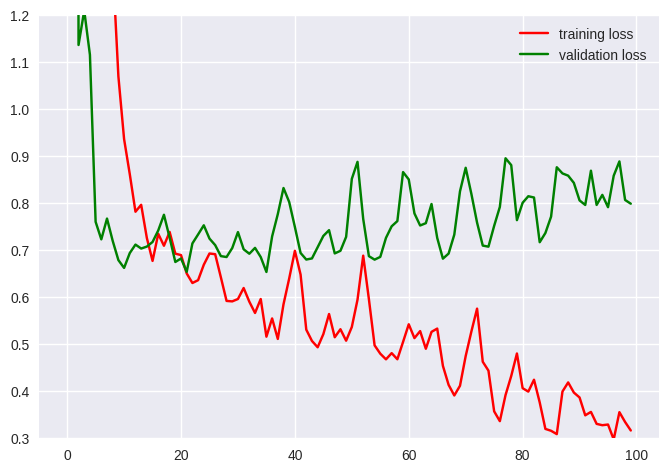

In [187]:
plt.style.use("seaborn")
plt.plot(Inceptionhist.history['loss'],label="training loss",c='red')
plt.plot(Inceptionhist.history['val_loss'],label="validation loss",c='green')
plt.ylim(0.3,1.2)
plt.legend()
plt.show()

/tmp/ipykernel_854420/561891000.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


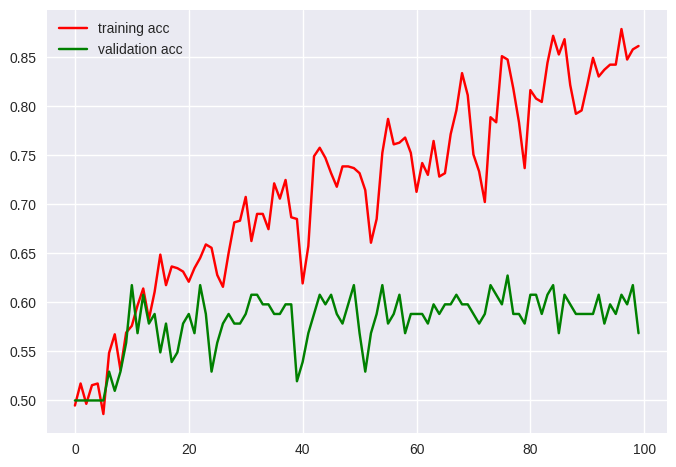

In [188]:
plt.style.use("seaborn")
plt.plot(Inceptionhist.history['acc'],label="training acc",c='red')
plt.plot(Inceptionhist.history['val_acc'],label="validation acc",c='green')
plt.legend()
plt.show()

4/4 [==============================] - 3s 351ms/step
confusion Matrix:
[[52  8]
 [32 28]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.62      0.87      0.72        60
 Trimester 3       0.78      0.47      0.58        60

    accuracy                           0.67       120
   macro avg       0.70      0.67      0.65       120
weighted avg       0.70      0.67      0.65       120

**********************************************
Accuracy Score : 0.6666666666666666
**********************************************
F1 Score : 0.5833333333333334
**********************************************
Class Wise Accuracy :
Trimester 1 Accuracy : 86.66666666666667
Trimester 3 Accuracy : 46.666666666666664
**********************************************
ROC_AUC Score: 0.6666666666666667
**********************************************
Cohen_kappa score: 0.33333333333333337


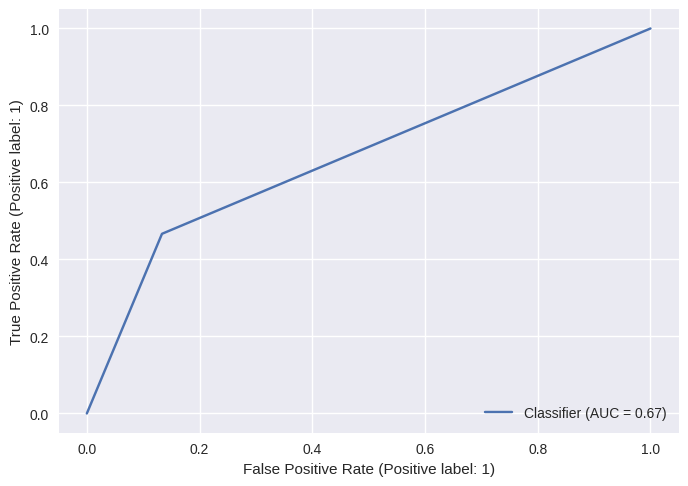

In [189]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 3'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Trimester 1 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [190]:
df = pd.DataFrame({'loss' : Inceptionhist.history["loss"],
                                'val_loss' : Inceptionhist.history["val_loss"],
                                'accuracy' : Inceptionhist.history["acc"],
                               "val_accuracy": Inceptionhist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Second_third/Inceptionhist_23.csv')